In [1]:
#imports
import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load images
aster_image = gdal.Open('E:Company/KAVOSHGARAN/Virtual Irrigation/Image/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf')
bands = []

In [4]:
#Get bands
for sd , des in aster_image.GetSubDatasets():
    bands. append(sd)
    print(des)

[5041x5665] ImageData2 VNIR_Swath (8-bit unsigned integer)
[5041x5665] ImageData1 VNIR_Swath (8-bit unsigned integer)
[5041x5665] ImageData3N VNIR_Swath (8-bit unsigned integer)
[841x945] ImageData10 TIR_Swath (16-bit unsigned integer)
[841x945] ImageData11 TIR_Swath (16-bit unsigned integer)
[841x945] ImageData12 TIR_Swath (16-bit unsigned integer)
[841x945] ImageData13 TIR_Swath (16-bit unsigned integer)
[841x945] ImageData14 TIR_Swath (16-bit unsigned integer)
[11x11] Latitude (64-bit floating-point)
[11x11] Longitude (64-bit floating-point)
[5041x5665] ImageData2 (8-bit unsigned integer)
[5041x5665] ImageData1 (8-bit unsigned integer)
[5041x5665] ImageData3N (8-bit unsigned integer)
[11x11] Latitude (64-bit floating-point)
[11x11] Longitude (64-bit floating-point)
[841x945] ImageData10 (16-bit unsigned integer)
[841x945] ImageData11 (16-bit unsigned integer)
[841x945] ImageData12 (16-bit unsigned integer)
[841x945] ImageData13 (16-bit unsigned integer)
[841x945] ImageData14 (16-bit

In [7]:
#extract images and chnage to array 
vni_1 = gdal.Open(bands[0]).ReadAsArray().astype(float)
vni_2 = gdal.Open(bands[1]).ReadAsArray().astype(float)
vni_3 = gdal.Open(bands[2]).ReadAsArray().astype(float)

In [8]:
#normalization
norm_v1 = (vni_1 - np.min(vni_1)) / (np.max(vni_1) - np.min(vni_1))
norm_v2 = (vni_2 - np.min(vni_2)) / (np.max(vni_2) - np.min(vni_2))
norm_v3 = (vni_3 - np.min(vni_3)) / (np.max(vni_3) - np.min(vni_3))

In [9]:
#To combine images
stack=np.stack([norm_v3,norm_v2,norm_v1],axis=2)

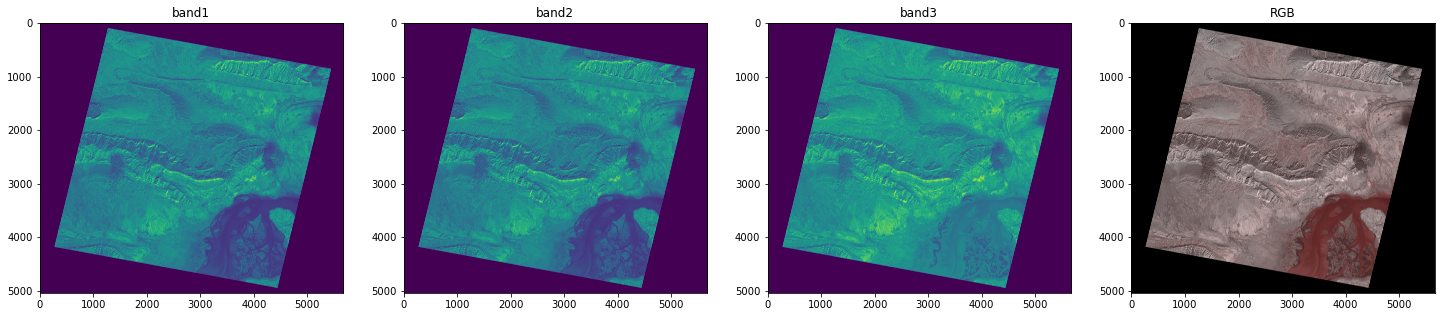

In [35]:
#demonstrated
fig,ax =plt.subplots(nrows=1 , ncols=4 , figsize=(25,25))
ax[0].imshow(norm_v1)
ax[0].set_title('band1')
ax[1].imshow(norm_v2)
ax[1].set_title('band2')
ax[2].imshow(norm_v3)
ax[2].set_title('band3')
ax[3].imshow(stack)
ax[3].set_title('RGB')
plt.savefig("aster2.png")
plt.show()